#### This Notebook will <li> import the main cleaned dataset <li> convert and summarize the submission time by second and by minute <li> plot and annotate the frequency of submissions by second and by minute for a selected 24 period

In [2]:
#import packages and set to display charts in document
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read in the main dataset, 3 million records.

In [3]:
#Read in Dataset
df = pd.read_csv('df_5.csv',encoding = 'latin-1')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (10,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [41]:
#Slice the dataset for just the dates
df = df[['id','date_submission']]

In [42]:
#Explore the dataset
df.head()

,id,date_submission
0,59f8b2bb50b733300f069dc9,2017-07-11T15:53:55.361Z
1,59f8b2bb50b733300f069dca,2017-07-11T15:53:55.390Z
2,59f8b2bb50b733300f069dcb,2017-07-11T15:53:55.449Z
3,59f8b2bb50b733300f069dcc,2017-07-11T15:53:55.473Z
4,59f8b2bb50b733300f069dcd,2017-07-11T15:53:55.512Z


Convert the submission date column to datetime and convert to seconds and to minutes. Group by count to get to create a column of the total number of submissions in that second 

In [49]:
#convert time text time to seconds segments
df['date_sec']= pd.to_datetime(df['date_submission'])
df['date_sec']= df['date_sec'].values.astype('datetime64[s]')

In [50]:
#convert time text time to minute segments
df['date_min']= pd.to_datetime(df['date_submission'])
df['date_min']= df['date_min'].values.astype('datetime64[m]')

In [51]:
#group by and count the submissions in that second
df['freq_time'] = df.groupby('date_sec')['date_sec'].transform('count')
df['freq_time'] = pd.to_numeric(df['freq_time'])

In [52]:
df_seconds = df['freq_time']

In [53]:
#explore the seconds series
df_seconds.head()
#129,286(!) records submitted on July 17, 2017 at 8:53pm 8seconds

0    12
1    12
2    12
3    12
4    12
Name: freq_time, dtype: int64

In [54]:
#select and graph +/- 24 hrs from 2017-07-17 20:53:08
df['date_sec'] = pd.to_datetime(df['date_sec'])  
mask = (df['date_sec'] >= '2017-07-16 20:53:08') & (df['date_sec'] <= '2017-07-18 20:53:08')

In [55]:
#explore the mask
df.loc[mask].head()

,id,date_submission,date_sec,date_min,freq_time
2230012,59f8ded450b733300f28b67f,2017-07-17T00:00:00.000Z,2017-07-17 00:00:00,2017-07-17 00:00:00,1
2286958,59f8dfca50b733300f29b507,2017-07-16T23:01:58.706Z,2017-07-16 23:01:58,2017-07-16 23:01:00,1
2286976,59f8e01550b733300f29f4d6,2017-07-16T23:25:35.935Z,2017-07-16 23:25:35,2017-07-16 23:25:00,2
2287533,59f8dff150b733300f29dc8a,2017-07-16T21:39:50.128Z,2017-07-16 21:39:50,2017-07-16 21:39:00,1
2288880,59f8dfca50b733300f29b5b5,2017-07-16T23:38:45.549Z,2017-07-16 23:38:45,2017-07-16 23:38:00,4


In [56]:
#slice dataframe through the 24 hour mask
df_timespan = df.loc[mask]

In [57]:
#look at the shape of our dataframe
df_timespan.shape

(631076, 5)

In [58]:
#explore the dataframe
df_timespan.head()

,id,date_submission,date_sec,date_min,freq_time
2230012,59f8ded450b733300f28b67f,2017-07-17T00:00:00.000Z,2017-07-17 00:00:00,2017-07-17 00:00:00,1
2286958,59f8dfca50b733300f29b507,2017-07-16T23:01:58.706Z,2017-07-16 23:01:58,2017-07-16 23:01:00,1
2286976,59f8e01550b733300f29f4d6,2017-07-16T23:25:35.935Z,2017-07-16 23:25:35,2017-07-16 23:25:00,2
2287533,59f8dff150b733300f29dc8a,2017-07-16T21:39:50.128Z,2017-07-16 21:39:50,2017-07-16 21:39:00,1
2288880,59f8dfca50b733300f29b5b5,2017-07-16T23:38:45.549Z,2017-07-16 23:38:45,2017-07-16 23:38:00,4


In [59]:
time_dfs = df_timespan['date_sec']

In [86]:
time_dfs.iloc[1]

Timestamp('2017-07-16 23:01:58')

In [85]:
time_dfs.iloc[-1]

Timestamp('2017-07-17 23:16:41')

In [61]:
time_dfs.head()

2230012   2017-07-17 00:00:00
2286958   2017-07-16 23:01:58
2286976   2017-07-16 23:25:35
2287533   2017-07-16 21:39:50
2288880   2017-07-16 23:38:45
Name: date_sec, dtype: datetime64[ns]

In [62]:
count_s = df_timespan['date_sec'].value_counts()

In [83]:
count_s.head(15)

2017-07-17 20:53:08    129286
2017-07-17 20:39:21     90679
2017-07-17 21:07:07     67025
2017-07-17 21:02:51     66852
2017-07-17 23:01:02     40426
2017-07-17 23:16:41     14947
2017-07-17 14:33:14     13433
2017-07-17 20:04:55     12237
2017-07-17 23:19:39      1345
2017-07-17 18:40:41      1064
2017-07-17 20:18:43       325
2017-07-17 20:53:49        52
2017-07-17 19:58:15        28
2017-07-17 19:55:19        25
2017-07-17 19:56:51        24
Name: date_sec, dtype: int64

In [64]:
count_s.shape

(63731,)

In [65]:
count_m = df_timespan['date_min'].value_counts()

In [66]:
count_m.head()

2017-07-17 20:53:00    129719
2017-07-17 20:39:00     91176
2017-07-17 21:02:00     67349
2017-07-17 21:07:00     67308
2017-07-17 23:01:00     40972
Name: date_min, dtype: int64

In [32]:
count_m.shape

(1588,)

In [33]:
count_s_time = pd.DataFrame(count_s)

In [34]:
count_s_time = count_s_time.sort_index(axis=1)

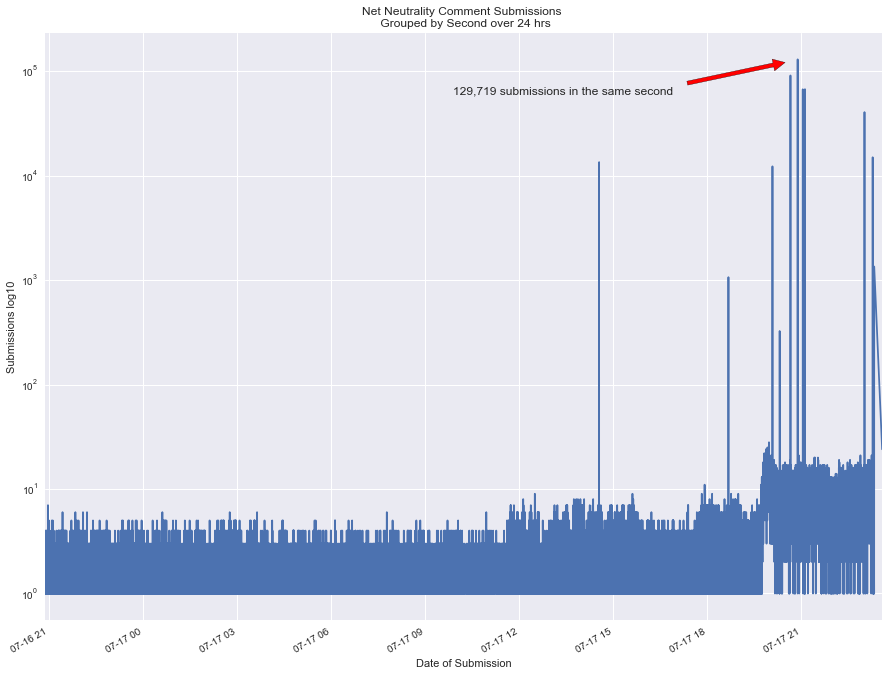

In [100]:
sns.set()
plt.xlabel('Date of Submission')
plt.ylabel('Submissions log10')
plt.title('Net Neutrality Comment Submissions \n Grouped by Second over 24 hrs')
plt.annotate('129,719 submissions in the same second', xy=('2017-07-17 20:53:00', 128000), xytext=('2017-07-17 09:53:00', 60000),arrowprops=dict(facecolor='red', shrink=0.1))

count_s_time['date_sec'].plot(x_compat=True, logy=True, figsize=(15,12))


In [38]:
count_m_time = pd.DataFrame(count_m)

In [39]:
count_m_time = count_m_time.sort_index(axis=1)

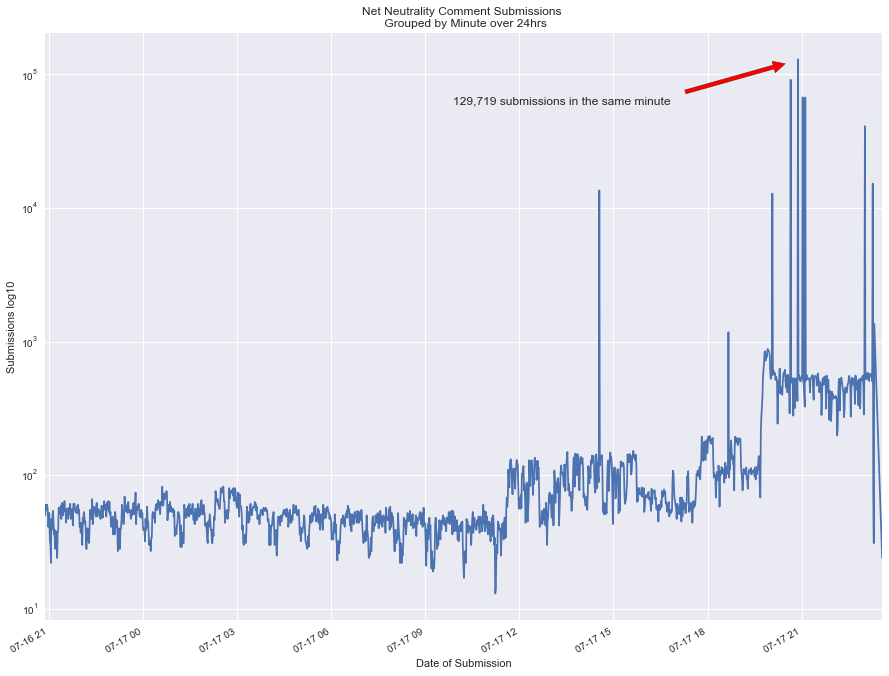

In [101]:
sns.set()
plt.xlabel('Date of Submission')
plt.ylabel('Submissions log10')
plt.title('Net Neutrality Comment Submissions \n Grouped by Minute over 24hrs')

plt.annotate('129,719 submissions in the same minute', xy=('2017-07-17 20:53:00', 128000), xytext=('2017-07-17 09:53:00', 60000),arrowprops=dict(facecolor='red', shrink=0.1))
count_m_time['date_min'].plot(x_compat=True, logy=True, figsize=(15,12))